In [5]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [6]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [19]:
b=201
a=0.5
gamma = 5.0                      # strength of the vortex
y_vortex = numpy.zeros(b)    # location of the y vortex
x_vortex =numpy.linspace(-50, 50, b) # location of the x vortex

In [20]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u =+strength*numpy.sinh(2*math.pi*Y/a)/(2*a*(numpy.cosh(2*math.pi*Y/a)-numpy.cos(2*math.pi*X/a)))
    v =-strength*numpy.sin(2*math.pi*X/a)/(2*a*(numpy.cosh(2*math.pi*Y/a)-numpy.cos(2*math.pi*X/a)))
    
    return u, v

In [21]:
u_final,v_final=0,0
for i in range(len(x_vortex)):
    u_vortex, v_vortex= get_velocity_vortex(gamma, x_vortex[i], y_vortex[i], X, Y)
    u_final=u_vortex+ u_final
    v_final=v_final+ v_vortex

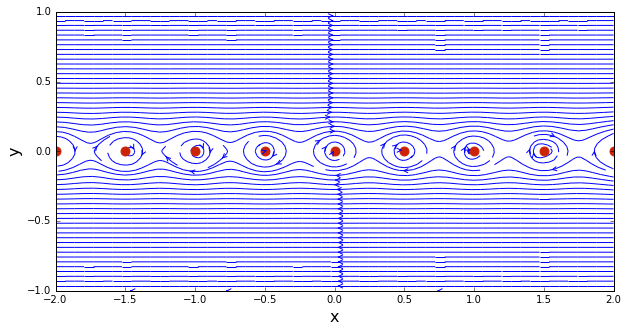

In [22]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_final, v_final, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');